## Machine Learning HW1 Problem 2

0845209 . Siméon Gaumart



# question a

In [38]:
#importing libs
%matplotlib inline
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 
plt.rcParams['figure.figsize']=(16,9)
plt.style.use('ggplot')

In [39]:
#importing datas
try:
    continueProg = True
    data = pd.read_csv('./MEAP93.csv')
    #print("data shape :",data.shape)
    math10=data["math10"].values
    #print("math10",math10)
    lnchprg=data["lnchprg"].values
    #print("lnchprg",lnchprg)
except:
    continueProg = False
    print("error : read data fails")
    print("please put datas on the same folder")


math10 = 32.14271164450065 + -0.31886428597057154 * lnchprg


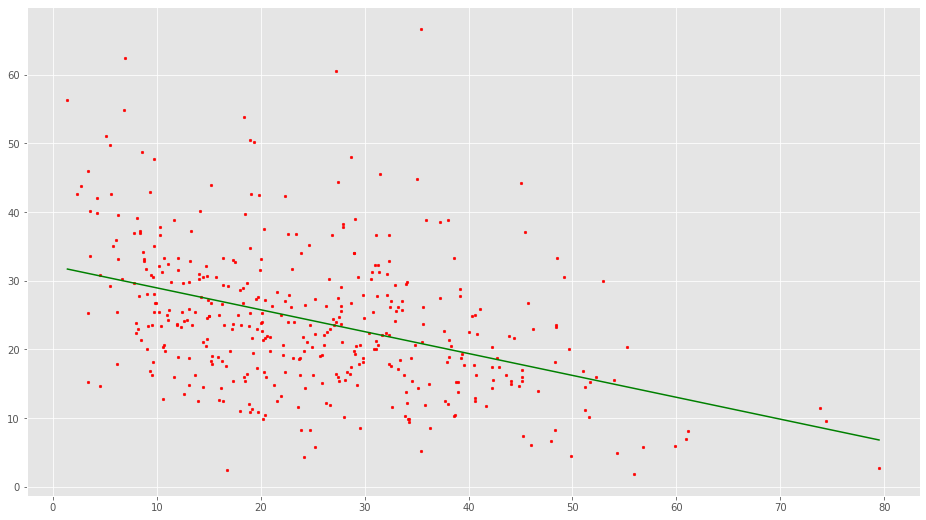

In [44]:
if continueProg :
    
    def lossFunction(x,y,b0,b1):
        nx=len(x)
        ny=len(y)
        S=0
        if nx == ny :
            for i in range (0,nx):
                S=S+(y[i]-(b0+x[i]*b1))**2
            return S
        else :
            return False
        
    def dLossFunctionB0(x,y):
        nx=len(x)
        ny=len(y)
        coeffB0=0
        coeffB1=0
        coeffN=0
        if nx == ny :
            for i in range (0,nx):
                coeffB0=coeffB0+2
                coeffB1=coeffB1+2*x[i]
                coeffN=coeffN+(-2)*y[i]
            return coeffB0, coeffB1, coeffN
        else :
            return False
        
    def dLossFunctionB1(x,y):
        nx=len(x)
        ny=len(y)
        coeffB0=0
        coeffB1=0
        coeffN=0
        if nx == ny :
            for i in range (0,nx):
                coeffB0=coeffB0+2*x[i]
                coeffB1=coeffB1+2*x[i]*x[i]
                coeffN=coeffN+(-2)*y[i]*x[i]
            return coeffB0, coeffB1, coeffN
        else :
            return False
    
    def LinearReg(lnchprgf,math10f):
        dB0coeffB0, dB0coeffB1, dB0coeffN = dLossFunctionB0(lnchprgf,math10f)
        dB1coeffB0, dB1coeffB1, dB1coeffN = dLossFunctionB1(lnchprgf,math10f)

        A = np.array([[dB0coeffB0, dB0coeffB1],[dB1coeffB0, dB1coeffB1]])
        C = np.array([-dB0coeffN, -dB1coeffN])
        B = np.linalg.solve(A,C)

        B0f = B[0]
        B1f = B[1]
              
        return B0f, B1f
    
    B0, B1 = LinearReg(lnchprg,math10)
    
    print("math10 = "+str(B0)+" + "+str(B1)+" * lnchprg")
    
    plt.scatter(lnchprg,math10,c='r',s=7)
    #nbPoint=2
    #Lx=np.linspace(np.min(lnchprg),np.max(lnchprg),nbPoint)
    Lx=[np.min(lnchprg),np.max(lnchprg)]
    Ly=[]
    for i in range (0,len(Lx)):
        Ly.append(B1*Lx[i]+B0)
    plt.plot(Lx,Ly,c='g')
    plt.show()
    